In [1]:
import warnings

warnings.filterwarnings("ignore")

import os
import sys

dir2 = os.path.abspath("")
dir1 = os.path.dirname(dir2)
if dir1 not in sys.path:
    sys.path.append(dir1)

os.chdir("..")

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import uncertainty_toolbox as uct
import yaml
from sklearn.calibration import calibration_curve
from src.datasets.datasets import CPDDatasets
from src.ensembles.ensembles import EnsembleCPDModel
from src.metrics.evaluation_pipelines import collect_model_predictions_on_set
from torch.utils.data import DataLoader

%load_ext autoreload
%autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test

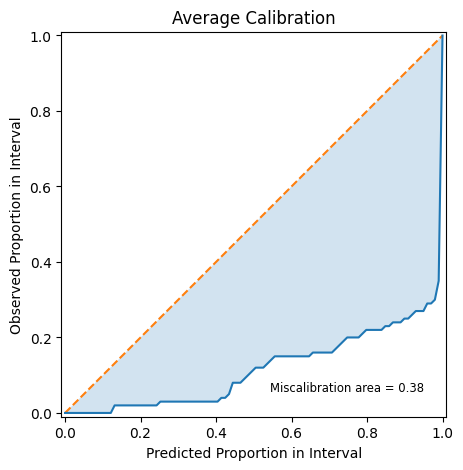

In [26]:
predictions = torch.rand(100)
pred_std = torch.rand(100) / 4
true_values = torch.randint(2, (100,))

uct.viz.plot_calibration(predictions.numpy(), pred_std.numpy(), true_values.numpy());

# BCE HAR

In [79]:
model_type = "seq2seq"

experiments_name = "human_activity"

path_to_config = "configs/" + experiments_name + "_" + model_type + ".yaml"

with open(path_to_config, "r") as f:
    args_config = yaml.safe_load(f.read())

args_config["experiments_name"] = experiments_name
args_config["model_type"] = model_type

args_config["loss_type"] = "bce"
args_config["num_workers"] = 2

train_dataset, test_dataset = CPDDatasets(experiments_name).get_dataset_()
test_dataloader = DataLoader(
    test_dataset, batch_size=args_config["learning"]["batch_size"], shuffle=False
)

In [80]:
path_to_models_folder = "saved_models/bce/human_activity/full_sample"

ens_bce = EnsembleCPDModel(args_config, n_models=10, boot_sample_size=None)
ens_bce.load_models_list(path_to_models_folder)

In [41]:
test_out_bank, test_uncertainties_bank, test_labels_bank = (
    collect_model_predictions_on_set(
        ens_bce, test_dataloader, model_type="ensemble", device="cpu"
    )
)

test_out_flat = torch.vstack(test_out_bank).flatten()
test_labels_flat = torch.vstack(test_labels_bank).flatten()
test_uncertainties_flat = torch.vstack(test_uncertainties_bank).flatten()

test_out_flat.shape, test_labels_flat.shape, test_uncertainties_flat.shape

Collectting model's outputs


100%|██████████| 21/21 [00:01<00:00, 17.80it/s]


(torch.Size([26740]), torch.Size([26740]), torch.Size([26740]))

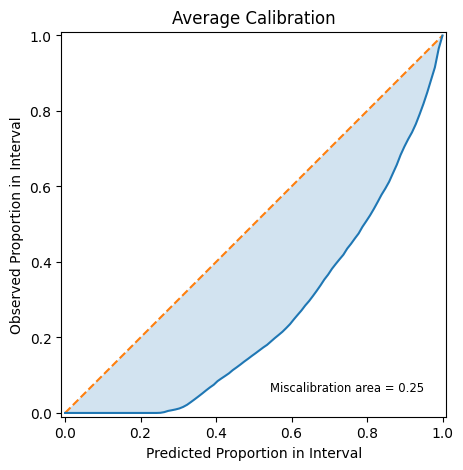

In [42]:
uct.viz.plot_calibration(
    test_out_flat.numpy(), test_uncertainties_flat.numpy(), test_labels_flat.numpy()
);

### Mean Ensemble

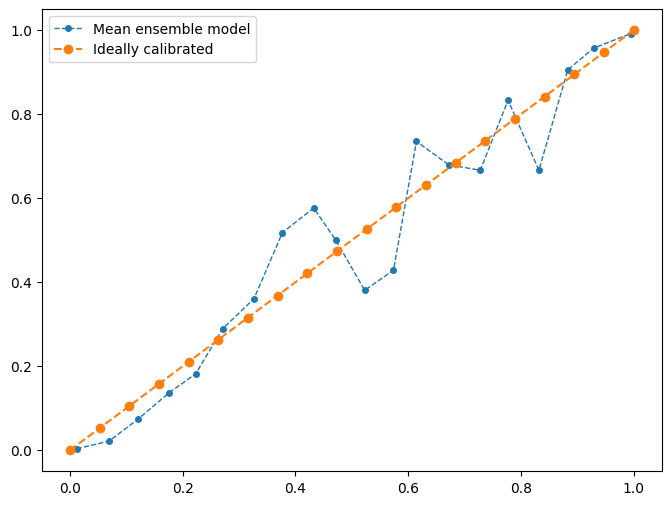

In [69]:
prob_true, prob_pred = calibration_curve(test_labels_flat, test_out_flat, n_bins=20)

x_ideal = np.linspace(0, 1, 20)

plt.figure(figsize=(8, 6))
plt.plot(
    prob_pred,
    prob_true,
    linestyle="--",
    marker="o",
    markersize=4,
    linewidth=1,
    label="Mean ensemble model",
)
plt.plot(x_ideal, x_ideal, linestyle="--", marker="o", label="Ideally calibrated")
plt.legend()
plt.show()

### All single models

Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 23.69it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 27.94it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 27.63it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 27.88it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 26.07it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 27.59it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 27.66it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 27.57it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 27.21it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 27.85it/s]


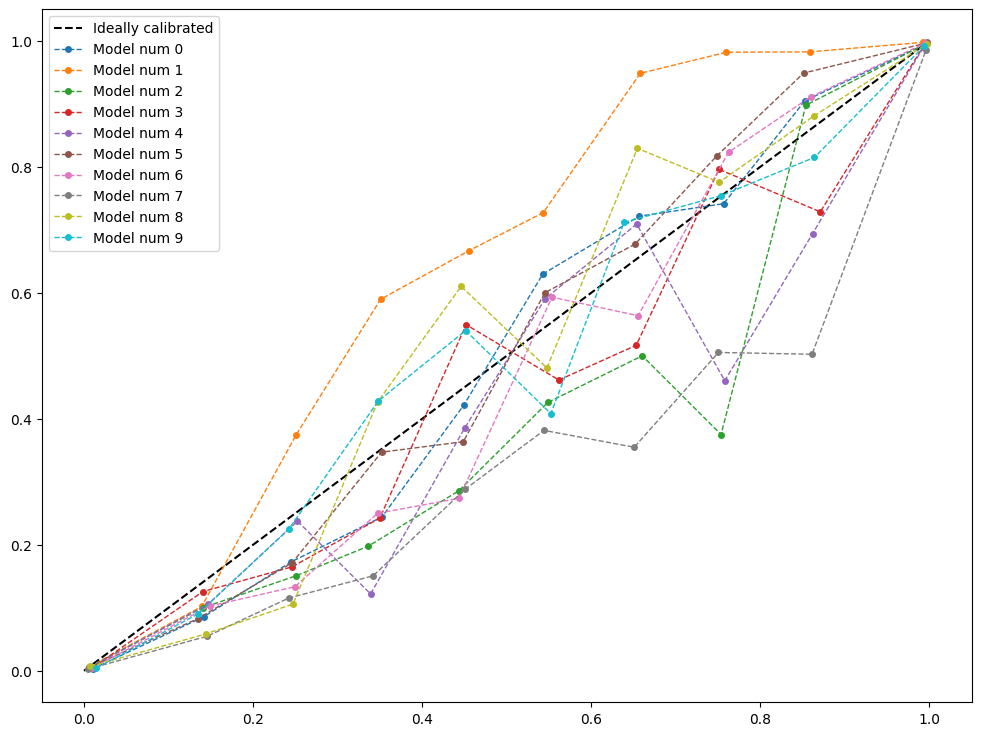

In [81]:
plt.figure(figsize=(12, 9))
plt.plot(x_ideal, x_ideal, linestyle="--", label="Ideally calibrated", c="black")

for i, model in enumerate(ens_bce.models_list):
    test_out_bank, _, test_labels_bank = collect_model_predictions_on_set(
        model, test_dataloader, model_type="seq2seq", device="cpu"
    )

    test_out_flat = torch.vstack(test_out_bank).flatten()
    test_labels_flat = torch.vstack(test_labels_bank).flatten()

    prob_true, prob_pred = calibration_curve(test_labels_flat, test_out_flat, n_bins=10)
    plt.plot(
        prob_pred,
        prob_true,
        linestyle="--",
        marker="o",
        markersize=4,
        linewidth=1,
        label=f"Model num {i}",
    )

plt.legend()
plt.show()

# BCE-SGLD HAR

In [74]:
model_type = "seq2seq"

experiments_name = "human_activity"

path_to_config = "configs/" + experiments_name + "_" + model_type + ".yaml"

with open(path_to_config, "r") as f:
    args_config = yaml.safe_load(f.read())

args_config["experiments_name"] = experiments_name
args_config["model_type"] = model_type

args_config["loss_type"] = "bce"
args_config["num_workers"] = 2

train_dataset, test_dataset = CPDDatasets(experiments_name).get_dataset_()
test_dataloader = DataLoader(
    test_dataset, batch_size=args_config["learning"]["batch_size"], shuffle=False
)

In [75]:
path_to_models_folder = "saved_models/bce/human_activity/sgld_adam"

ens_bce = EnsembleCPDModel(args_config, n_models=10, boot_sample_size=None)
ens_bce.load_models_list(path_to_models_folder)

Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 25.14it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 27.85it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 27.27it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 27.49it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 27.21it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 27.78it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 27.75it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 27.68it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 26.99it/s]


Collectting model's outputs


100%|██████████| 21/21 [00:00<00:00, 27.44it/s]


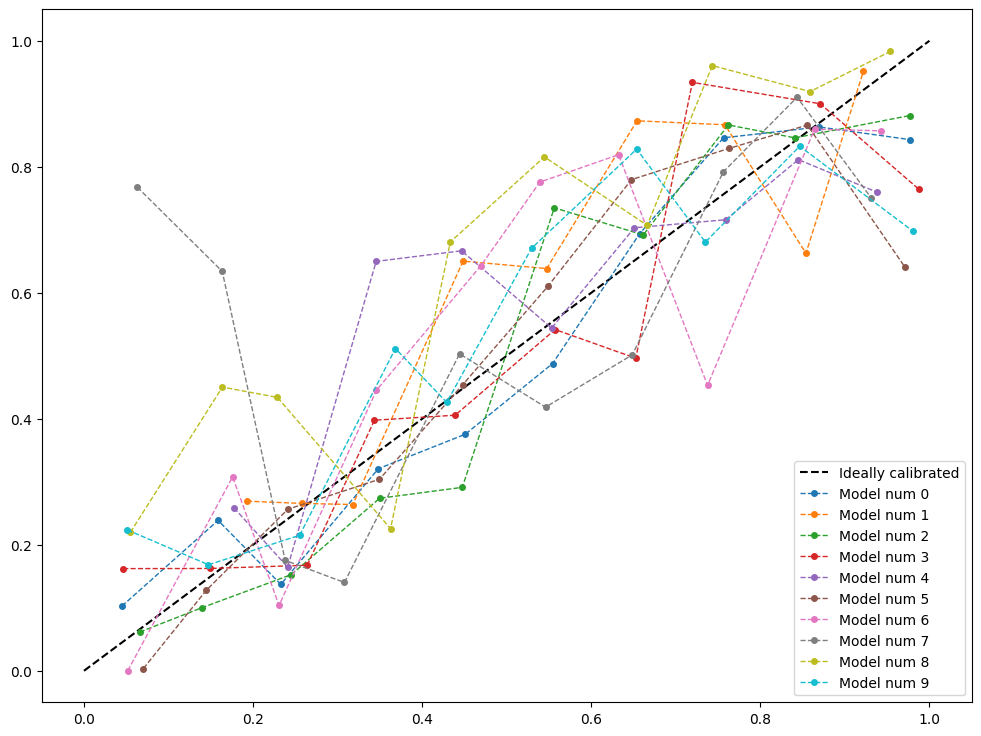

In [78]:
plt.figure(figsize=(12, 9))
plt.plot(x_ideal, x_ideal, linestyle="--", label="Ideally calibrated", c="black")

for i, model in enumerate(ens_bce.models_list):
    test_out_bank, _, test_labels_bank = collect_model_predictions_on_set(
        model, test_dataloader, model_type="seq2seq", device="cpu"
    )

    test_out_flat = torch.vstack(test_out_bank).flatten()
    test_labels_flat = torch.vstack(test_labels_bank).flatten()

    prob_true, prob_pred = calibration_curve(test_labels_flat, test_out_flat, n_bins=10)
    plt.plot(
        prob_pred,
        prob_true,
        linestyle="--",
        marker="o",
        markersize=4,
        linewidth=1,
        label=f"Model num {i}",
    )

plt.legend()
plt.show()

# BCE Explosion

In [82]:
model_type = "seq2seq"

experiments_name = "explosion"

path_to_config = "configs/" + "video" + "_" + model_type + ".yaml"

with open(path_to_config, "r") as f:
    args_config = yaml.safe_load(f.read())

args_config["experiments_name"] = experiments_name
args_config["model_type"] = model_type

args_config["loss_type"] = "bce"
args_config["num_workers"] = 2

train_dataset, test_dataset = CPDDatasets(experiments_name).get_dataset_()
test_dataloader = DataLoader(
    test_dataset, batch_size=args_config["learning"]["batch_size"], shuffle=False
)